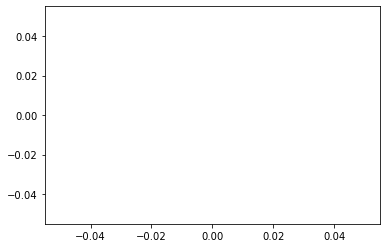

In [1]:
%matplotlib inline
# force plt on windows 10
import matplotlib.pyplot as plt
plt.plot()

import sys
sys.path.append("..")

import aggets.ds.window as window
import aggets.ds.climate_load as cl
import aggets.ds.window as window

In [2]:
data = cl.load()

In [3]:
CONV_WIDTH = 3
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)

conv_window = window.WindowGenerator(
    train_df = data['train'],
    val_df = data['val'],
    test_df = data['test'],
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['T (degC)']
)
conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['T (degC)']

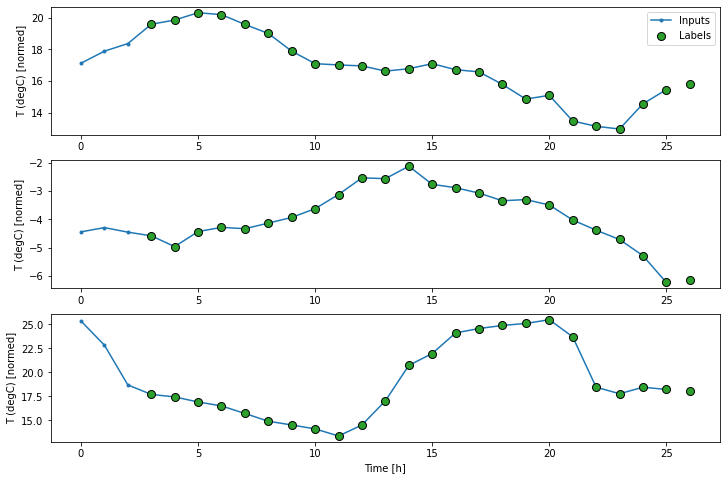

In [4]:
conv_window.plot()

In [5]:
print('X(batch, sequence, features) =', next(conv_window.train)[0].shape)
print('y(batch, sequence, features) =', next(conv_window.train)[1].shape)

X(batch, sequence, features) = torch.Size([32, 26, 19])
y(batch, sequence, features) = torch.Size([32, 24, 1])


epoch 0 batch 1000 loss=1.08, MTL=4.47, MVL=nan				
epoch 1 batch 2000 loss=1.1, MTL=1.01, MVL=0.962				
epoch 1 batch 3000 loss=1.21, MTL=0.927, MVL=0.962				
epoch 2 batch 4000 loss=0.716, MTL=0.801, MVL=0.626				
epoch 3 batch 5000 loss=0.722, MTL=0.702, MVL=0.743				
epoch 3 batch 6000 loss=0.603, MTL=0.7, MVL=0.743				
epoch 4 batch 7000 loss=0.555, MTL=0.659, MVL=0.615				
epoch 5 batch 8000 loss=0.576, MTL=0.629, MVL=0.531				
epoch 5 batch 9000 loss=0.616, MTL=0.617, MVL=0.531				
epoch 6 batch 10000 loss=0.557, MTL=0.617, MVL=1.11				
epoch 7 batch 11000 loss=0.492, MTL=0.59, MVL=0.561				
epoch 7 batch 12000 loss=0.521, MTL=0.584, MVL=0.561				
epoch 8 batch 13000 loss=0.582, MTL=0.566, MVL=0.588				
epoch 9 batch 14000 loss=0.495, MTL=0.572, MVL=0.502				
epoch 9 batch 15000 loss=0.524, MTL=0.558, MVL=0.502				


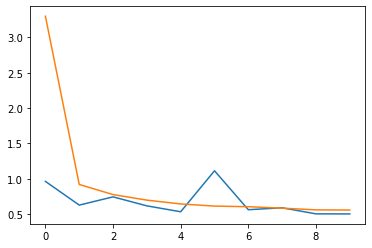

In [6]:
import aggets.train as train
import aggets.model.simple as simple

model = simple.conv_1d(CONV_WIDTH, 19, 64)
train.train_window_model(model, conv_window, max_epochs=10)

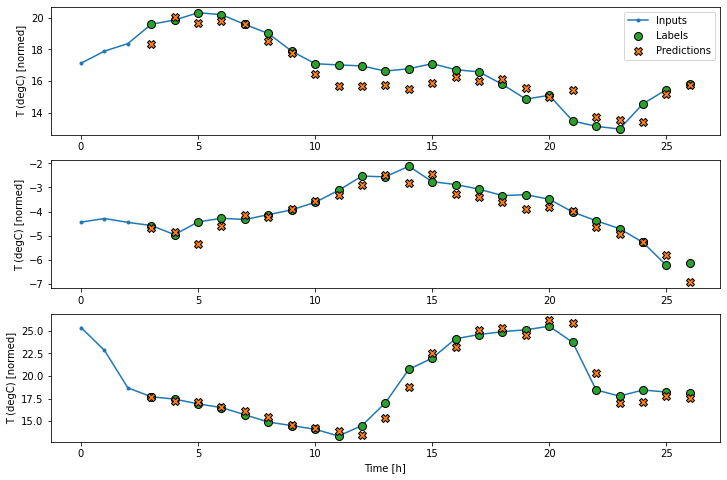

In [7]:
conv_window.plot(model)